# Bagel Playground

Check runtime type (CPU or GPU):

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-31590316-ffb9-6021-93c6-e72990f54653)


Install Bagel from source and download the test data:

In [2]:
!pip install git+https://github.com/AlumiK/bagel-tensorflow.git
!wget https://github.com/AlumiK/bagel-tensorflow/raw/main/sample/data/cpu4.csv

  Cloning https://github.com/AlumiK/bagel-tensorflow.git to /tmp/pip-req-build-ozonkcl8
  Running command git clone -q https://github.com/AlumiK/bagel-tensorflow.git /tmp/pip-req-build-ozonkcl8
  Created wheel for bagel-tensorflow: filename=bagel_tensorflow-1.5.0-cp36-none-any.whl size=10290 sha256=b7e3701fd1a3aad9ccb7968b1b9c79a1827217b90e434afcddb3d92b1ee0145a
  Stored in directory: /tmp/pip-ephem-wheel-cache-2sqc4ifi/wheels/79/4f/da/07588a416042426b566b3a45a5940c0b8bfea1640c65709a8d
Successfully built bagel-tensorflow
--2020-11-11 11:45:36--  https://github.com/AlumiK/bagel-tensorflow/raw/main/sample/data/cpu4.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AlumiK/bagel-tensorflow/main/sample/data/cpu4.csv [following]
--2020-11-11 11:45:36--  https://raw.githubusercontent.com/AlumiK/bagel-tensorflow/main/sample/data

Import libraries:

In [3]:
import os
import bagel
import matplotlib.pyplot as plt

Run Bagel:

KPI: cpu4
Training Epoch
50/50 [==============================] - 12s 235ms/epoch - loss: -74.5264 - val_loss: -67.9937
Testing Epoch
21/21 [==============================] - 2s 116ms/step - test_loss: -63.3407
Metrics
precision: 1.000 - recall: 1.000 - f1score: 1.000



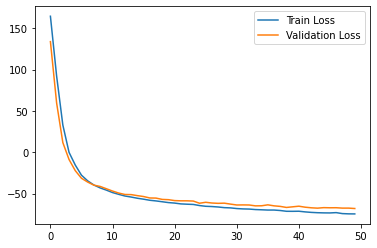

In [4]:
# Read KPI data
kpi = bagel.utils.load_kpi('cpu4.csv')
print(f'KPI: {kpi.name}')

# Fill missing points with 0
kpi.complete_timestamp()

# Split the KPI and standardize them
train_kpi, valid_kpi, test_kpi = kpi.split((0.49, 0.21, 0.3))
train_kpi, mean, std = train_kpi.standardize()
valid_kpi, _, _ = valid_kpi.standardize(mean=mean, std=std)
test_kpi, _, _ = test_kpi.standardize(mean=mean, std=std)

# Create a Bagel instance
model = bagel.models.Bagel()

# Train and test
r = model.fit(kpi=train_kpi.no_labels(),
                validation_kpi=valid_kpi,
                epochs=50)
anomaly_scores = model.predict(test_kpi)
results = bagel.testing.get_test_results(labels=test_kpi.labels,
                                            scores=anomaly_scores,
                                            missing=test_kpi.missing)

# Print metrics
print('Metrics')
print(f'precision: {results.get("precision"):.3f} - '
        f'recall: {results.get("recall"):.3f} - '
        f'f1score: {results.get("f1score"):.3f}\n')

# Plot losses
plt.plot(r.get('loss'), label='Train Loss')
plt.plot(r.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()